In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# font - 한글이 깨지기 않게 하기 위해
plt.rc('font', family = 'AppleGothic')

### 1-1) 산점도 그래프
- 데이터 파일 : kbo.csv

In [2]:
# data load

data1 = pd.read_csv('../data/kbo.csv', encoding = 'CP949') # UTF-8 에러 => encoding 추가
print(data1)

    Unnamed: 0  순위   선수명    팀명    AVG  HR    R  RBI
0            1   1   최형우    삼성  0.376  31   99  144
1            2   2   김태균    한화  0.365  23   94  136
2            3   3   이용규    한화  0.352   3   98   41
3            4   4   김주찬    기아  0.346  23   97  101
4            5   5   박용택    엘지  0.346  11   84   90
5            6   6   구자욱    삼성  0.343  14  105   77
6            7   7   박민우    엔씨  0.343   3   84   55
7            8   8   유한준   케이티  0.336  14   70   64
8            9   9   황재균    롯데  0.335  27   97  113
9           10  10   박건우    두산  0.335  20   95   83
10          11  11   고종욱    넥센  0.334   8   92   72
11          12  12   김재환    두산  0.325  37  107  124
12          13  13   송광민    한화  0.325  17   80   83
13          14  14   김문호    롯데  0.325   7   77   70
14          15  15   서건창    넥센  0.325   7  111   63
15          16  16   민병헌    두산  0.325  16   98   87
16          17  17   손아섭    롯데  0.323  16  118   81
17          18  18   강민호    롯데  0.323  20   65   72
18          

In [3]:
# plot data
x_data1 = data1['AVG'] # 타율
y_data1 = data1['HR'] # 홈런

print(y_data1.max())
print(y_data1.min())

40
1


Text(0.5, 1.0, '산점도 그래프 (과제 1-1)')

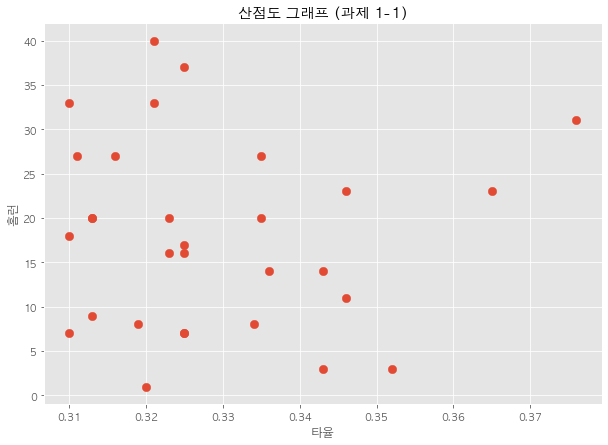

In [4]:
# draw
plt.style.use('ggplot')
fig1 = plt.figure(figsize = (10,7))
plt.scatter(x = x_data1, y = y_data1, s = 70)

plt.grid(True)
plt.ylabel('홈런')
plt.xlabel('타율')
plt.title('산점도 그래프 (과제 1-1)')

In [5]:
# 저장
fig1.savefig('HW1_1_19011773.png', bbox_inches = 'tight', dpi = 300)

### 1-2) 막대 그래프
- 데이터 파일 : final_exam.csv

In [6]:
# data load
data2 = pd.read_csv('../data/final_exam.csv', encoding = 'CP949', index_col = 'names') # encoding error => encoding 추가
print(data2)

      gender  korean  english  math  computer  science
names                                                 
강감찬        M      85       77    80       100       96
이순신        M      86       90    82        93       93
신사임당       F      80       98    87        92       90
서현진        F      97       87    80        85       80
전지현        F     100      100    98       100       94


In [7]:
# chart data
x_data2 = data2.index
y_data2 = data2['korean']

print(y_data2.min())
print(y_data2.max())

80
100


In [8]:
# mean
mean = int(y_data2.mean())
print(mean)

# color
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
bar_color = colors[0:len(y_data2)]
print(bar_color)

89
['b', 'g', 'r', 'c', 'm']


Text(0, 90, '평균 : 89점')

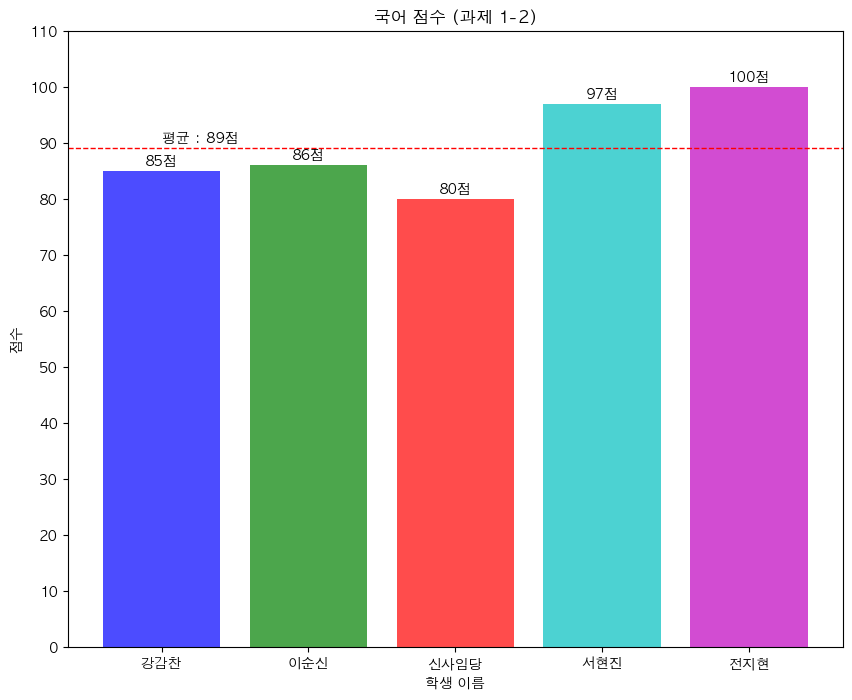

In [9]:
# draw plot

## 1. 전반적인 그래프 그리기
plt.style.use('default')
plt.rc('font', family = 'AppleGothic')

fig2 = plt.figure(figsize = (10, 8))
plt.bar(x_data2, y_data2, color = bar_color, alpha = 0.7)
plt.xlabel('학생 이름')
plt.ylabel('점수')
plt.title('국어 점수 (과제 1-2)')


## 2. yticks
YTICKS_INTERVAL = 10 # 간격
maxlim = int(y_data2.max() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # 상한값
values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)
plt.yticks(values)


## 3. 세부사항 - 각각의 점수와 전체 평균
### 각각의 점수
for idx in range(y_data2.size):
    std_score = format(y_data2[idx])+'점' # 점수 입력
    plt.text(x = idx, y = y_data2[idx]+1, s = std_score, horizontalalignment = 'center')

### 전체 평균
mean_score = '평균 : %d점'%mean
plt.axhline(y = mean, color = 'r', linewidth = 1, linestyle = 'dashed')
plt.text(x = y_data2.size-5, y = mean+1, s = mean_score)


In [10]:
# 저장 :: 객체를 저장해줘야 함
fig2.savefig('HW1_2_19011773.png', bbox_inches = 'tight', dpi = 300)

### 1-3) 산점도 그래프에 legend 추가

- 4주차 강의자료 p.19 참고

In [2]:
# data load
diamonds = pd.read_csv('../data/diamonds.csv')
print(diamonds)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [34]:
# data sampling
FRACTION = 0.01
diamonds = diamonds.sample(frac=FRACTION)

print(diamonds)
print(diamonds.columns)

       carat        cut color clarity  depth  table  price     x     y     z
1623    0.73  Very Good     D     SI1   60.8   59.0   3014  5.80  5.85  3.54
20109   1.50      Ideal     G     SI2   62.0   57.0   8580  7.26  7.31  4.52
50092   0.57      Ideal     G    VVS2   61.7   56.0   2206  5.33  5.30  3.28
11050   0.28  Very Good     F    VVS2   61.8   60.0    596  4.16  4.19  2.58
21049   0.31      Ideal     H    VVS2   62.2   55.0    625  4.35  4.36  2.71
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
30175   0.38      Ideal     H     VS1   61.1   55.0    721  4.68  4.72  2.87
1829    1.03  Very Good     G      I1   62.4   57.0   3060  6.41  6.45  4.01
48785   0.53      Ideal     D     SI1   60.4   57.0   2021  5.28  5.31  3.20
39296   0.30      Ideal     H     VS2   62.3   57.0    491  4.27  4.30  2.67
50681   0.53      Ideal     E    VVS2   62.4   56.0   2288  5.15  5.17  3.22

[539 rows x 10 columns]
Index(['carat', 'cut', 'color', 'clarity', 'depth',

In [35]:
# chart data
x_data = diamonds['price']
y_data = diamonds['depth']
print(x_data.head())
print(y_data.head())

# 원의 크기 : table에 따른 크기 구분
size = diamonds['table'] 
print(size.max())
print(size.min())

# 색깔 : cut에 따른 색깔 구분
colors = ['r', 'g', 'b', 'y', 'm']
cut_list = diamonds['cut'].unique()
print(cut_list)
color_dict = {cut_list[idx] : colors[idx] for idx in range(len(cut_list))}
print(color_dict)

1623     3014
20109    8580
50092    2206
11050     596
21049     625
Name: price, dtype: int64
1623     60.8
20109    62.0
50092    61.7
11050    61.8
21049    62.2
Name: depth, dtype: float64
65.0
53.0
['Very Good' 'Ideal' 'Fair' 'Premium' 'Good']
{'Very Good': 'r', 'Ideal': 'g', 'Fair': 'b', 'Premium': 'y', 'Good': 'm'}


In [36]:
# color, size 지정

def apply_color(cut):
    return color_dict[cut]

diamonds['new_cut'] = diamonds['cut'].apply(apply_color)
new_cut = diamonds['new_cut']


def apply_size(size):
    if size >=60:
        return 100
    elif size >=58:
        return 30
    elif size >= 54:
        return 5
    else:
        return 1

diamonds['new_table'] = diamonds['table'].apply(apply_size)
new_table = diamonds['new_table']

print(diamonds.head())

       carat        cut color clarity  depth  table  price     x     y     z  \
1623    0.73  Very Good     D     SI1   60.8   59.0   3014  5.80  5.85  3.54   
20109   1.50      Ideal     G     SI2   62.0   57.0   8580  7.26  7.31  4.52   
50092   0.57      Ideal     G    VVS2   61.7   56.0   2206  5.33  5.30  3.28   
11050   0.28  Very Good     F    VVS2   61.8   60.0    596  4.16  4.19  2.58   
21049   0.31      Ideal     H    VVS2   62.2   55.0    625  4.35  4.36  2.71   

      new_cut  new_table  
1623        r         30  
20109       g          5  
50092       g          5  
11050       r        100  
21049       g          5  


([<matplotlib.axis.YTick at 0x7ff1920ff760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

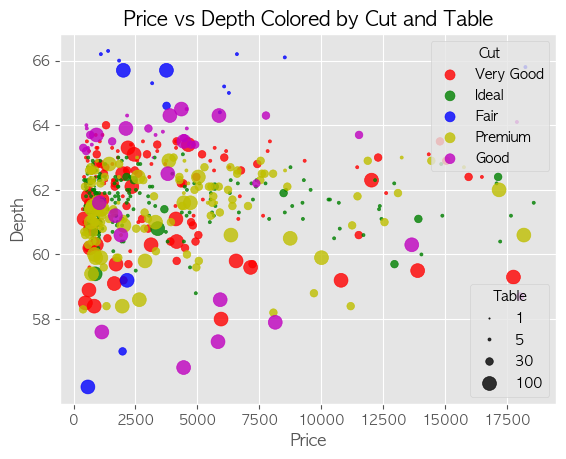

In [37]:
# chart draw - legend : cut, table
plt.style.use('ggplot')
fig3 = plt.figure()
ax = fig3.add_subplot(1, 1, 1)

idx = 0
for x in cut_list:
    x_data = diamonds.loc[diamonds['cut'] == x, 'price']
    y_data = diamonds.loc[diamonds['cut'] == x, 'depth']
    color = diamonds.loc[diamonds['cut'] == x, 'new_cut']
    size = diamonds.loc[diamonds['cut'] == x, 'new_table']
    scatter1 = ax.scatter(x=x_data, y=y_data, s = size, c = color, alpha = 0.8, label = x) # s : 도형의 크기, c : 색상
    idx+=1


# cut에 대한 legend
legend1 = ax.legend(title="Cut", loc = 'upper right')  
ax.add_artist(legend1)
# table에 대한 legend
legend2 = ax.legend(*scatter1.legend_elements("sizes"),  title = "Table", loc = 'lower right')



ax.grid(True)
ax.set_title('Price vs Depth Colored by Cut and Table')
ax.set_xlabel('Price')
ax.set_ylabel('Depth')


# ytick
YTICKS_INTERVAL = 2
maxlim = int(y_data.max() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # max
minlim = int(y_data.min() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # min
# print(maxlim)
# print(minlim)
values = np.arange(minlim, maxlim+1, YTICKS_INTERVAL)
plt.yticks(values)

In [38]:
# 저장
fig3.savefig('HW1_3_19011773.png', bbox_inches = 'tight', dpi = 300)

([<matplotlib.axis.YTick at 0x7ff1921e9760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

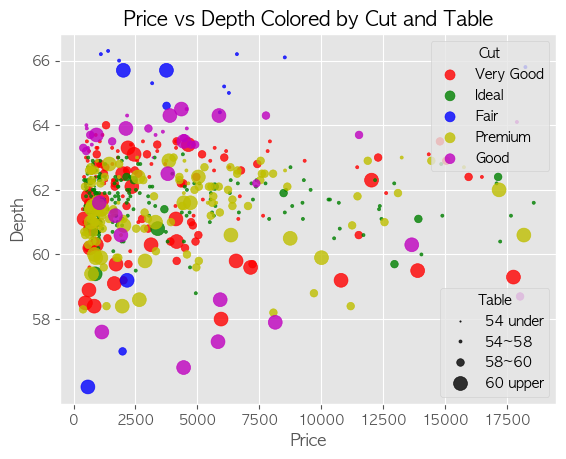

In [39]:
# chart draw - legend : cut, table
table_label = {'1' : '54 under', '5' : '54~58', '30' : '58~60', '100' : '60 upper'}
plt.style.use('ggplot')
fig3_ = plt.figure()
ax_ = fig3_.add_subplot(1, 1, 1)

idx = 0
for x in cut_list:
    x_data = diamonds.loc[diamonds['cut'] == x, 'price']
    y_data = diamonds.loc[diamonds['cut'] == x, 'depth']
    color = diamonds.loc[diamonds['cut'] == x, 'new_cut']
    size = diamonds.loc[diamonds['cut'] == x, 'new_table']
    scatter_ = ax_.scatter(x=x_data, y=y_data, s = size, c = color, alpha = 0.8, label = x) # s : 도형의 크기, c : 색상
    idx+=1


# cut에 대한 legend
legend1 = ax_.legend(title="Cut", loc = 'upper right')  
ax_.add_artist(legend1)
# table에 대한 legend
handles, labels= scatter_.legend_elements(prop="sizes")
legend2 = ax_.legend(handles, table_label.values(), title = "Table", loc = 'lower right')



ax_.grid(True)
ax_.set_title('Price vs Depth Colored by Cut and Table')
ax_.set_xlabel('Price')
ax_.set_ylabel('Depth')


# ytick
YTICKS_INTERVAL = 2
maxlim = int(y_data.max() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # max
minlim = int(y_data.min() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # min
values = np.arange(minlim, maxlim+1, YTICKS_INTERVAL)
plt.yticks(values)

In [40]:
# 저장
fig3_.savefig('HW1_3__19011773.png', bbox_inches = 'tight', dpi = 300)

66
58


([<matplotlib.axis.YTick at 0x7ff18f2409d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

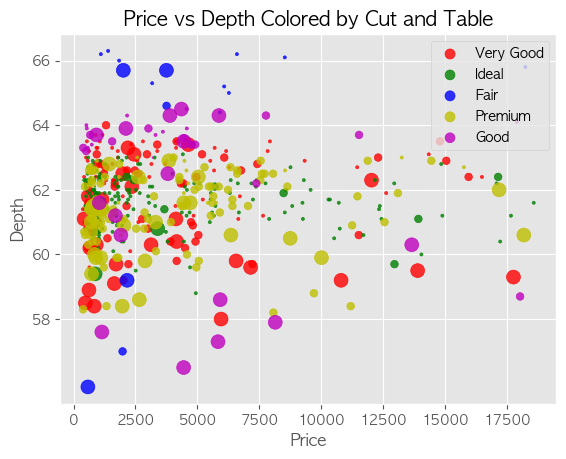

In [41]:
# chart draw - legend : cut
plt.style.use('ggplot')
fig4 = plt.figure()
ax1 = fig4.add_subplot(1, 1, 1)

idx = 0
for x in cut_list:
    x_data = diamonds.loc[diamonds['cut'] == x, 'price']
    y_data = diamonds.loc[diamonds['cut'] == x, 'depth']
    color = diamonds.loc[diamonds['cut'] == x, 'new_cut']
    size = diamonds.loc[diamonds['cut'] == x, 'new_table']
    ax1.scatter(x=x_data, y=y_data, s = size, c = color, alpha = 0.8, label = x) # s : 도형의 크기, c : 색상
    idx+=1

ax1.grid(True)
ax1.legend(loc = 'upper right')  # cut에 대한 legend
# ax1.legend(diamonds['table'].unique())
ax1.set_title('Price vs Depth Colored by Cut and Table')
ax1.set_xlabel('Price')
ax1.set_ylabel('Depth')


# ytick
YTICKS_INTERVAL = 2
maxlim = int(y_data.max() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # max
minlim = int(y_data.min() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # min
print(maxlim)
print(minlim)
values = np.arange(minlim, maxlim+1, YTICKS_INTERVAL)
plt.yticks(values)

In [42]:
# 저장
fig4.savefig('HW1_3_cut_19011773.png', bbox_inches = 'tight', dpi = 300)

([<matplotlib.axis.YTick at 0x7ff18f361b80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

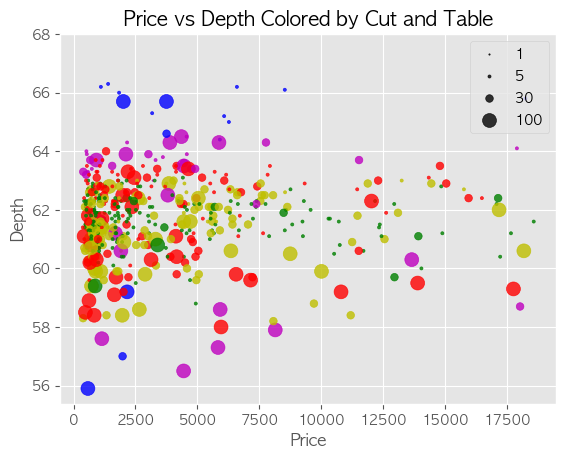

In [43]:
# chart draw - legend : table
x_data = diamonds['price']
y_data = diamonds['depth']
plt.style.use('ggplot')
fig5 = plt.figure()
ax2 = fig5.add_subplot(1, 1, 1)

axis = ax2.scatter(x=x_data, y=y_data, s = new_table, c = new_cut, alpha = 0.8) # s : 도형의 크기, c : 색상

ax2.grid(True)
ax2.legend(*axis.legend_elements("sizes"), loc = 'upper right')
ax2.set_title('Price vs Depth Colored by Cut and Table')
ax2.set_xlabel('Price')
ax2.set_ylabel('Depth')


# ytick
YTICKS_INTERVAL = 2
maxlim = int(y_data.max() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # max
minlim = int(y_data.min() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # min
values = np.arange(minlim, maxlim+1, YTICKS_INTERVAL)
plt.yticks(values)

In [44]:
# 저장
fig5.savefig('HW1_3_table_19011773.png', dpi = 300)

### 전체 그래프 합쳐서 PDF로 저장


In [45]:
from matplotlib.backends.backend_pdf import PdfPages

pdfsave = PdfPages("HW_19011773.pdf")
pdfsave.savefig(fig1)
pdfsave.savefig(fig2)
pdfsave.savefig(fig3)
pdfsave.savefig(fig3_)
pdfsave.savefig(fig4)
pdfsave.savefig(fig5)
pdfsave.close()

### 1-3) solution

In [3]:
print(diamonds)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [4]:
FRACTION = 0.005
diamonds = diamonds.sample(frac=FRACTION)

In [5]:
xdata = diamonds['price']
ydata = diamonds['depth']
table = diamonds['table']

In [6]:
mycolor = ['r', 'g', 'b', 'y', 'm']
cut_list = diamonds['cut'].unique()
cut_list

array(['Premium', 'Ideal', 'Good', 'Very Good', 'Fair'], dtype=object)

In [7]:
cut_dict = {cut_list[idx]:mycolor[idx] for idx in range(len(cut_list))}    # cut에 따른 색상 지정
cut_dict

{'Premium': 'r', 'Ideal': 'g', 'Good': 'b', 'Very Good': 'y', 'Fair': 'm'}

In [8]:
def recode_cut(cut):
    return cut_dict[cut]

In [9]:
# 문자열 데이터를 숫자형으로 변환
diamonds['newcut'] = diamonds['cut'].apply(recode_cut)
newcut = diamonds['newcut'] # 범주형 자료(숫자형)

In [10]:
def recode_table(table):
    if table >= 60:
        return 100
    elif table >= 58:
        return 30
    elif table >= 54:
        return 5
    else :
        return 1

In [11]:
diamonds['newtable'] = diamonds['table'].apply(recode_table)
newtable = diamonds['newtable'] # 범주형 자료(숫자형)

In [12]:
table_dict = dict(zip([1, 5, 30, 100], ['54.0 미만', '54.0 ~ 57.9', '58.0 ~ 59.9', '60.0 이상']))
table_dict

{1: '54.0 미만', 5: '54.0 ~ 57.9', 30: '58.0 ~ 59.9', 100: '60.0 이상'}

In [13]:
def cut_to_int(cut):
    return dict(zip(mycolor, range(len(mycolor))))[cut]

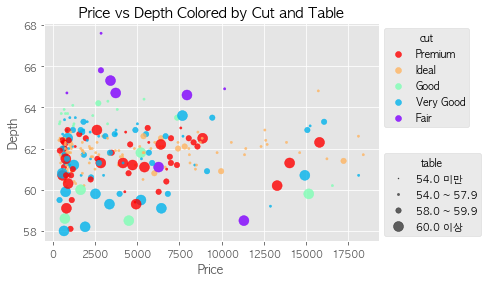

In [16]:
plt.style.use('ggplot')

scatter_plot = plt.figure()
ax1 = scatter_plot.add_subplot(1, 1, 1)

scatter = ax1.scatter(x=xdata, y=ydata, s=newtable, c=newcut.apply(cut_to_int), cmap='rainbow_r', alpha=0.8)


ax1.set_title('Price vs Depth Colored by Cut and Table')
ax1.set_xlabel('Price')
ax1.set_ylabel('Depth')

# 다른 점!! .legend_elements()로 실행
handles, labels = scatter.legend_elements()

legend1 = ax1.legend(handles, cut_list,
                    loc="upper left", title="cut", bbox_to_anchor=(1, 1))
ax1.add_artist(legend1)


handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax1.legend(handles, ['54.0 미만', '54.0 ~ 57.9', '58.0 ~ 59.9', '60.0 이상'],
                     loc="lower left", title="table", bbox_to_anchor=(1, 0))
plt.show()
# plt.savefig('17011740_김민식_데이터시각화_HW1-3.png', bbox_extra_artists=(legend1, legend2), bbox_inches='tight')